In [1]:
import pandas as pd
import os
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt
import importlib
import numpy as np
import matplotlib

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


In [2]:
import pickle

In [3]:
import ASTRA_plots_utils
import plotting_utils
import predictions_evaluations
import utils

In [4]:
fleet_size = 18000
path = f'/cluster/scratch/mfrancesc/IVT/SA_scenario/zurich/astra_5km_100pct_copy/fleet_{fleet_size}'

In [5]:
#last_iter = 60
#methods = ['markov','msa02','mw5']

In [6]:
data_global = {}
for m in ['markov']:
    data_global[m] = ASTRA_plots_utils.read_output(
        os.path.join(path,"global"),
        last_iter=42
    )

100%|██████████| 43/43 [00:50<00:00,  1.19s/it]


In [7]:
data_fixed = ASTRA_plots_utils.read_output(
        os.path.join(path,"fixed"),
        last_iter=81
    )

100%|██████████| 82/82 [01:36<00:00,  1.18s/it]


In [8]:
data_dynamic_CN = {}
data_dynamic_CN['markov'] = {}
data_dynamic_CN['msa02'] = {}
data_dynamic_CN['mw5'] = {}

data_dynamic_CN['markov'][10] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", "k10"),
                last_iter=70
                )
data_dynamic_CN['markov'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", "k25"),
                last_iter=69
                )
data_dynamic_CN['markov'][50] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", "k50"),
                last_iter=67
                )
data_dynamic_CN['markov'][100] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", "k100"),
                last_iter=65
                )

data_dynamic_CN['msa02'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", 'msa02', "k25"),
                last_iter=68
                )
data_dynamic_CN['mw5'][25] = ASTRA_plots_utils.read_output(
                os.path.join(path,"dynamic_CN", 'mw5', "k25"),
                last_iter=68
                )

100%|██████████| 69/69 [01:50<00:00,  1.60s/it]


In [9]:
data_hex_500 = {}
data_hex_500['markov'] = ASTRA_plots_utils.read_output(
        os.path.join(path,"hex","500"),
        last_iter=68
        )

100%|██████████| 69/69 [01:53<00:00,  1.65s/it]


In [10]:
# TODO: square

In [11]:
data_dynamic_FD = {}
data_dynamic_FD['markov'] = {}
data_dynamic_FD['markov'][500] = ASTRA_plots_utils.read_output(
            os.path.join(path,"dynamic_FD", '500'),
            last_iter=60
            )

100%|██████████| 61/61 [01:44<00:00,  1.72s/it]


In [12]:
data_dynamic_PN = {}
data_dynamic_PN['markov'] = {}
data_dynamic_PN['markov'][0.1] = ASTRA_plots_utils.read_output(
            os.path.join(path,"dynamic_PN", f"p0.1_km1000"),
            last_iter=60
            )
data_dynamic_PN['markov'][0.2] = ASTRA_plots_utils.read_output(
            os.path.join(path,"dynamic_PN", f"p0.2_km1000"),
            last_iter=66
            )
data_dynamic_PN['markov'][0.3] = ASTRA_plots_utils.read_output(
            os.path.join(path,"dynamic_PN", f"p0.3_km1000"),
            last_iter=68
            )

100%|██████████| 69/69 [02:03<00:00,  1.79s/it]


In [13]:
data = {}
data['global'] = data_global
data['fixed'] = data_fixed
data['dynamic_CN'] = data_dynamic_CN
data['hex_500'] = data_hex_500
#data['square_850'] = data_square_850
data['dynamic_PN'] = data_dynamic_PN
data['dynamic_FD'] = data_dynamic_FD


In [14]:
write=False
if write:
    # this is just to save it in case scratch is deleted
    with open(os.path.join(path, 'data_dict.pkl'), 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
read=False
if read:
    with open(os.path.join(path, 'data_dict.pkl'), 'rb') as handle:
        data = pickle.load(handle)

In [28]:
compare_methods = [
    ("Fixed feedback", data['fixed'], 81),
    ("Global feedback", data['global']['markov'], 42),
    #("Square 850m", data['square_850']['markov'], 45),
    ("Hex 500m", data['hex_500']['markov'], 68),
    ("KNN-CN 10", data['dynamic_CN']['markov'][10], 70),
    ("KNN-CN 25", data['dynamic_CN']['markov'][25], 69),
    ("KNN-CN 50", data['dynamic_CN']['markov'][50], 67),
    ("KNN-CN 100", data['dynamic_CN']['markov'][100], 65),
    ("KNN-PN 0.1, 1000", data['dynamic_PN']['markov'][0.1], 60),
    ("KNN-PN 0.2, 1000", data['dynamic_PN']['markov'][0.2], 66),
    ("KNN-PN 0.3, 1000", data['dynamic_PN']['markov'][0.3], 68),
    ("FD 500", data['dynamic_FD']['markov'][500], 60)
]

In [29]:
t = plotting_utils.get_multiple_stats_table(compare_methods, add_iter=True)
t

Fixed feedback (it.81)  \
Number of rides                                           426958   
Wait time (min)                   Mean                   3.10677   
                                  Median                 1.91667   
                                  Std                    3.80275   
                                  75-perc                4.06667   
                                  99-perc                   17.1   
                                  Max                    150.533   
Travel time (min)                 Mean                   20.9413   
                                  Median                    15.6   
                                  Std                    19.0732   
                                  75-perc                  28.25   
                                  99-perc                88.9167   
                                  Max                    271.933   
Mean direct distance (km)                                4.18349   
Average detour factor (time wise)                        1.47334   
Total execution time                             9 days 22:28:13   

                                          Global feedback (it.42)  \
Number of rides                                            530118   
Wait time (min)                   Mean                    3.71066   
                                  Median                  2.21667   
                                  Std                     5.02658   
                                  75-perc                    4.75   
                                  99-perc                 22.0333   
                                  Max                      169.25   
Travel time (min)                 Mean                    23.7455   
                                  Median                  16.3833   
                                  Std                     23.5006   
                                  75-perc                 31.6167   
                                  99-perc                 112.533   
                                  Max                     306.867   
Mean direct distance (km)                                  3.9837   
Average detour factor (time wise)                         1.64736   
Total execution time                              5 days 14:29:47   

                                          Hex 500m (it.68) KNN-CN 10 (it.70)  \
Number of rides                                     607507            610065   
Wait time (min)                   Mean             3.17297           3.15966   
                                  Median               2.1               2.1   
                                  Std              3.52518           3.64277   
                                  75-perc          4.18333           4.16667   
                                  99-perc          16.4333           16.2893   
                                  Max              116.567           577.583   
Travel time (min)                 Mean               20.22           20.0439   
                                  Median           14.8167           14.7667   
                                  Std              18.4829             17.95   
                                  75-perc          27.5333           27.4167   
                                  99-perc          86.3657           84.0833   
                                  Max               243.05           211.483   
Mean direct distance (km)                          3.85915            3.8513   
Average detour factor (time wise)                   1.5146           1.50597   
Total execution time                       9 days 21:15:23   9 days 21:45:10   

                                          KNN-CN 25 (it.69) KNN-CN 50 (it.67)  \
Number of rides                                      608658            605464   
Wait time (min)                   Mean              3.19247           3.23123   
                                  Median                2.1               2.1   
                          

In [30]:
compare_methods_smoothing = [
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], 69-1),
    ("KNN-CN 25 Markov", data['dynamic_CN']['markov'][25], 69),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], 68-1),
    ("KNN-CN 25 MSA=0.2", data['dynamic_CN']['msa02'][25], 68),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], 68-1),
    ("KNN-CN 25 MW=5", data['dynamic_CN']['mw5'][25], 68)
]

In [31]:
t = plotting_utils.get_multiple_stats_table(compare_methods_smoothing, add_iter=True)
t

KNN-CN 25 Markov (it.68)  \
Number of rides                                             606805   
Wait time (min)                   Mean                      3.1918   
                                  Median                       2.1   
                                  Std                       3.6434   
                                  75-perc                  4.18333   
                                  99-perc                     16.9   
                                  Max                        107.9   
Travel time (min)                 Mean                     20.3028   
                                  Median                      14.8   
                                  Std                        18.75   
                                  75-perc                  27.5167   
                                  99-perc                     87.4   
                                  Max                      268.733   
Mean direct distance (km)                                  3.85669   
Average detour factor (time wise)                          1.52303   
Total execution time                               9 days 23:00:03   

                                          KNN-CN 25 Markov (it.69)  \
Number of rides                                             608658   
Wait time (min)                   Mean                     3.19247   
                                  Median                       2.1   
                                  Std                      3.65411   
                                  75-perc                  4.18333   
                                  99-perc                  16.7572   
                                  Max                      108.017   
Travel time (min)                 Mean                     20.2364   
                                  Median                   14.8167   
                                  Std                      18.5976   
                                  75-perc                     27.5   
                                  99-perc                    85.55   
                                  Max                       266.25   
Mean direct distance (km)                                  3.86045   
Average detour factor (time wise)                          1.51599   
Total execution time                               9 days 23:00:03   

                                          KNN-CN 25 MSA=0.2 (it.67)  \
Number of rides                                              598820   
Wait time (min)                   Mean                      3.18747   
                                  Median                        2.1   
                                  Std                       3.59162   
                                  75-perc                   4.18333   
                                  99-perc                   16.7333   
                                  Max                        127.55   
Travel time (min)                 Mean                      20.3037   
                                  Median                    14.8167   
                                  Std                       18.6579   
                                  75-perc                      27.6   
                                  99-perc                      86.8   
                                  Max                       249.683   
Mean direct distance (km)                                    3.8399   
Average detour factor (time wise)                           1.52074   
Total execution time                                9 days 22:36:27   

                                          KNN-CN 25 MSA=0.2 (it.68)  \
Number of rides                                              600970   
Wait time (min)                   Mean                      3.19211   
                                  Median                    2.08333   
                                  Std                       3.69636   
                                  75-perc                   4.18333   
                          

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.81),22448,-6.901006,3.661493,-9.983333,-9.483333,-8.033333,-5.916667,-0.150000,7.043167,60.066667,6.066667,8.091667,9.483333,9.483333,9.866667,2.652951,61.029820,7.812158,7.347903,95.206700
Global feedback (it.42),30795,-0.007329,5.009435,-3.676658,-3.026658,-1.476658,1.006676,7.840009,17.842009,120.823342,1.343324,2.543324,3.176658,7.840009,17.842009,4.013852,25.093677,5.009359,2.997110,67.608378
Hex 500m (it.68),32419,0.019885,3.402298,-13.756061,-1.936526,-0.720076,1.172749,6.026389,12.338529,43.616146,0.866108,1.729915,2.854367,6.414677,12.473973,2.495970,11.575673,3.402304,2.312100,61.639779
KNN-CN 10 (it.70),32247,0.085916,3.361176,-13.554857,-1.843202,-0.608900,1.220673,6.235048,12.022249,55.636214,0.814104,1.654831,2.907551,6.586729,12.049675,2.455989,11.304532,3.362221,2.296226,60.728130
KNN-CN 25 (it.69),32336,0.037987,3.490011,-13.751333,-1.921452,-0.754674,1.116356,6.096714,12.489666,59.714156,0.872847,1.721808,2.833946,6.394106,12.520039,2.613506,12.181244,3.490164,2.313187,62.614424
KNN-CN 50 (it.67),32454,0.008682,3.623536,-13.366762,-1.982249,-0.845815,1.049586,6.168499,12.813344,104.708333,0.910964,1.757108,2.810297,6.480554,12.865986,2.761964,13.129683,3.623490,2.345472,63.548407
KNN-CN 100 (it.65),31797,0.037594,3.538746,-13.370915,-1.999830,-0.872231,1.131592,6.221626,12.710481,64.958830,0.953730,1.802620,2.811045,6.439279,12.725335,2.636660,12.523745,3.538890,2.360460,63.229235
"KNN-PN 0.1, 1000 (it.60)",31527,0.037376,4.207767,-10.747012,-2.116325,-0.984469,1.077219,6.663125,13.898376,224.778744,1.019619,1.918310,2.941645,6.955008,13.898376,3.369553,17.706138,4.207866,2.520367,64.227488
"KNN-PN 0.2, 1000 (it.66)",32200,-0.051432,3.470722,-9.909639,-2.079357,-0.952338,1.017133,6.147304,12.928966,55.178237,0.974822,1.860104,2.834748,6.383073,12.928966,2.541996,12.048179,3.471049,2.363565,64.472050
"KNN-PN 0.3, 1000 (it.68)",32566,0.089384,4.256615,-9.938786,-2.042520,-0.901431,1.083969,6.329827,13.752794,129.376573,0.961510,1.850782,2.820427,6.505262,13.752794,3.487129,18.126206,4.257488,2.442568,63.600074


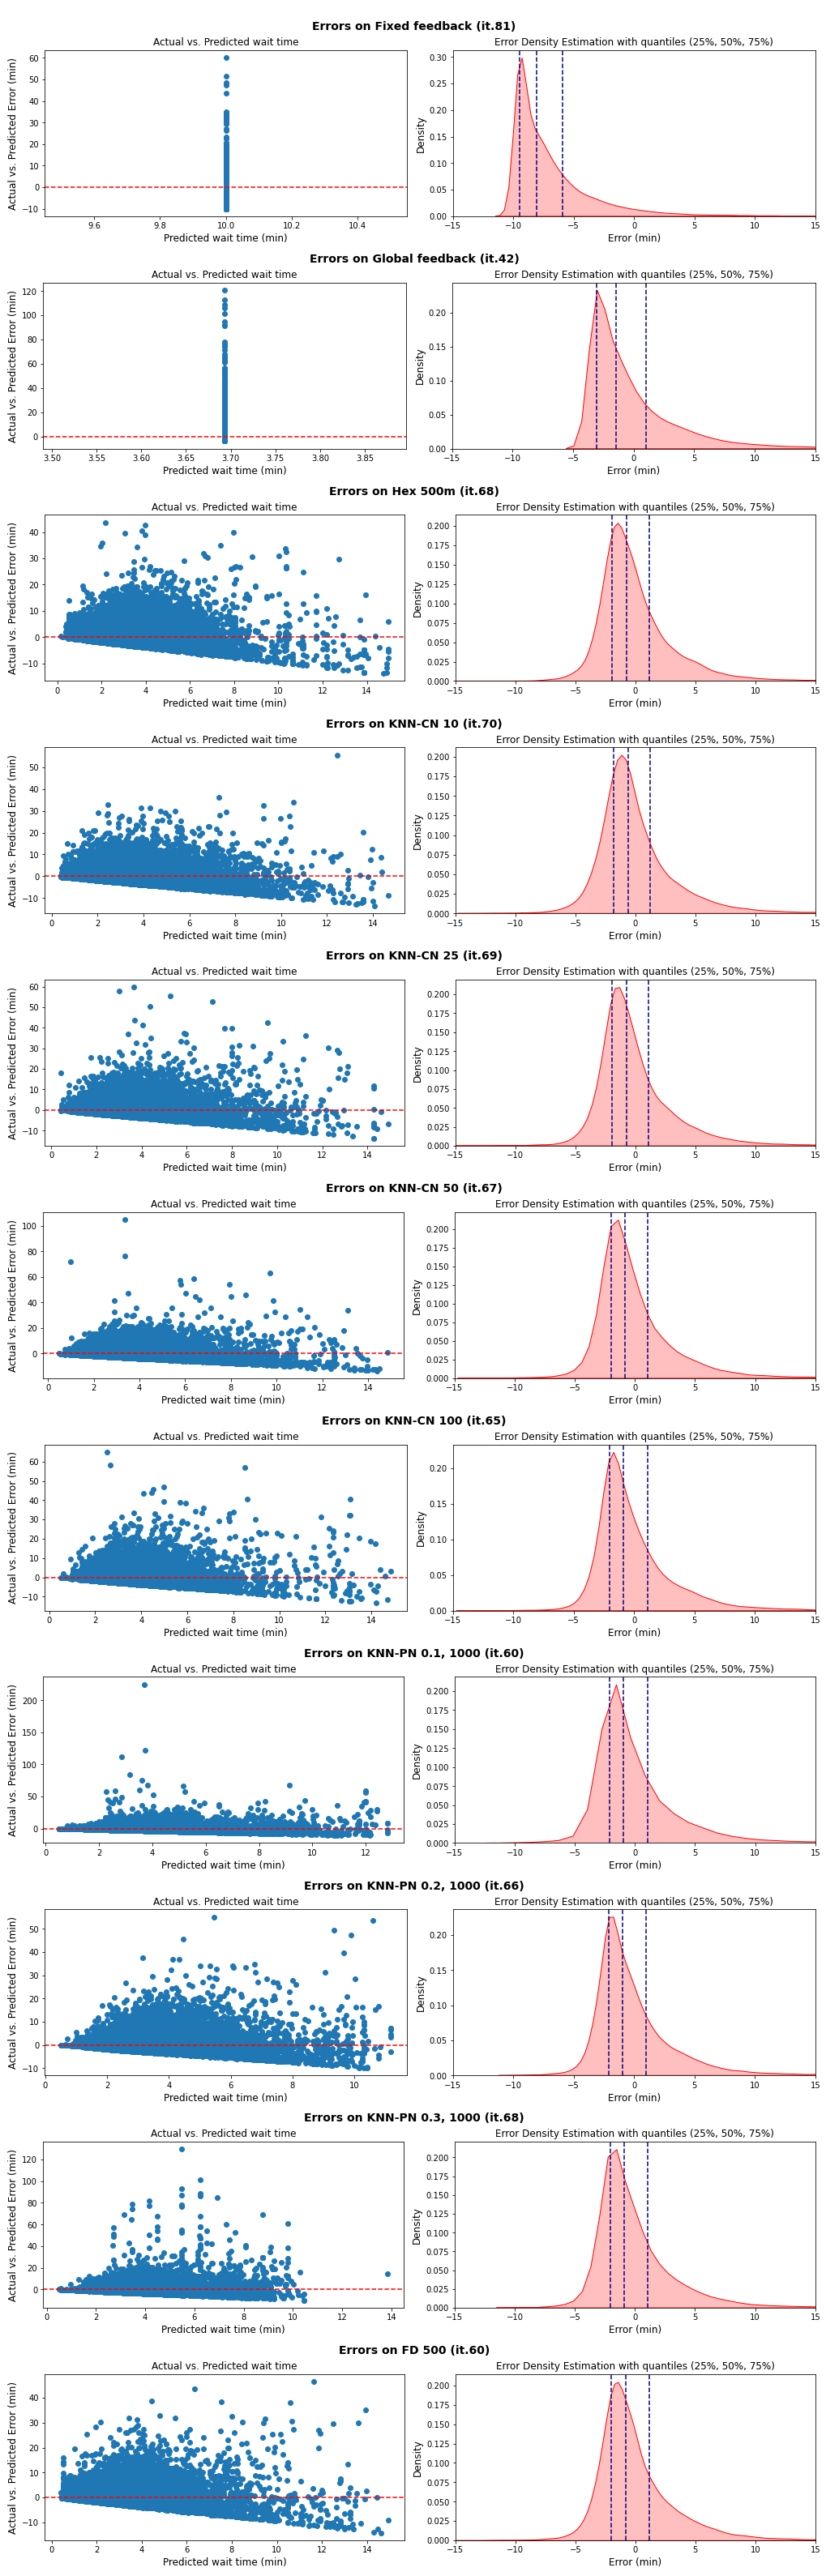

In [32]:
table_compare_methods = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True
)

In [33]:
t = table_compare_methods.copy(deep=True)
t = t.drop(columns=['min', '25%', '50%', '75%', '95%', '99%', 'max', 'MSE'])
t

,count,mean,std,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,RMSE,MAE,% errors < 0 (overestimated)
Fixed feedback (it.81),22448,-6.901006,3.661493,6.066667,8.091667,9.483333,9.483333,9.866667,2.652951,7.812158,7.347903,95.206700
Global feedback (it.42),30795,-0.007329,5.009435,1.343324,2.543324,3.176658,7.840009,17.842009,4.013852,5.009359,2.997110,67.608378
Hex 500m (it.68),32419,0.019885,3.402298,0.866108,1.729915,2.854367,6.414677,12.473973,2.495970,3.402304,2.312100,61.639779
KNN-CN 10 (it.70),32247,0.085916,3.361176,0.814104,1.654831,2.907551,6.586729,12.049675,2.455989,3.362221,2.296226,60.728130
KNN-CN 25 (it.69),32336,0.037987,3.490011,0.872847,1.721808,2.833946,6.394106,12.520039,2.613506,3.490164,2.313187,62.614424
KNN-CN 50 (it.67),32454,0.008682,3.623536,0.910964,1.757108,2.810297,6.480554,12.865986,2.761964,3.623490,2.345472,63.548407
KNN-CN 100 (it.65),31797,0.037594,3.538746,0.953730,1.802620,2.811045,6.439279,12.725335,2.636660,3.538890,2.360460,63.229235
"KNN-PN 0.1, 1000 (it.60)",31527,0.037376,4.207767,1.019619,1.918310,2.941645,6.955008,13.898376,3.369553,4.207866,2.520367,64.227488
"KNN-PN 0.2, 1000 (it.66)",32200,-0.051432,3.470722,0.974822,1.860104,2.834748,6.383073,12.928966,2.541996,3.471049,2.363565,64.472050
"KNN-PN 0.3, 1000 (it.68)",32566,0.089384,4.256615,0.961510,1.850782,2.820427,6.505262,13.752794,3.487129,4.257488,2.442568,63.600074


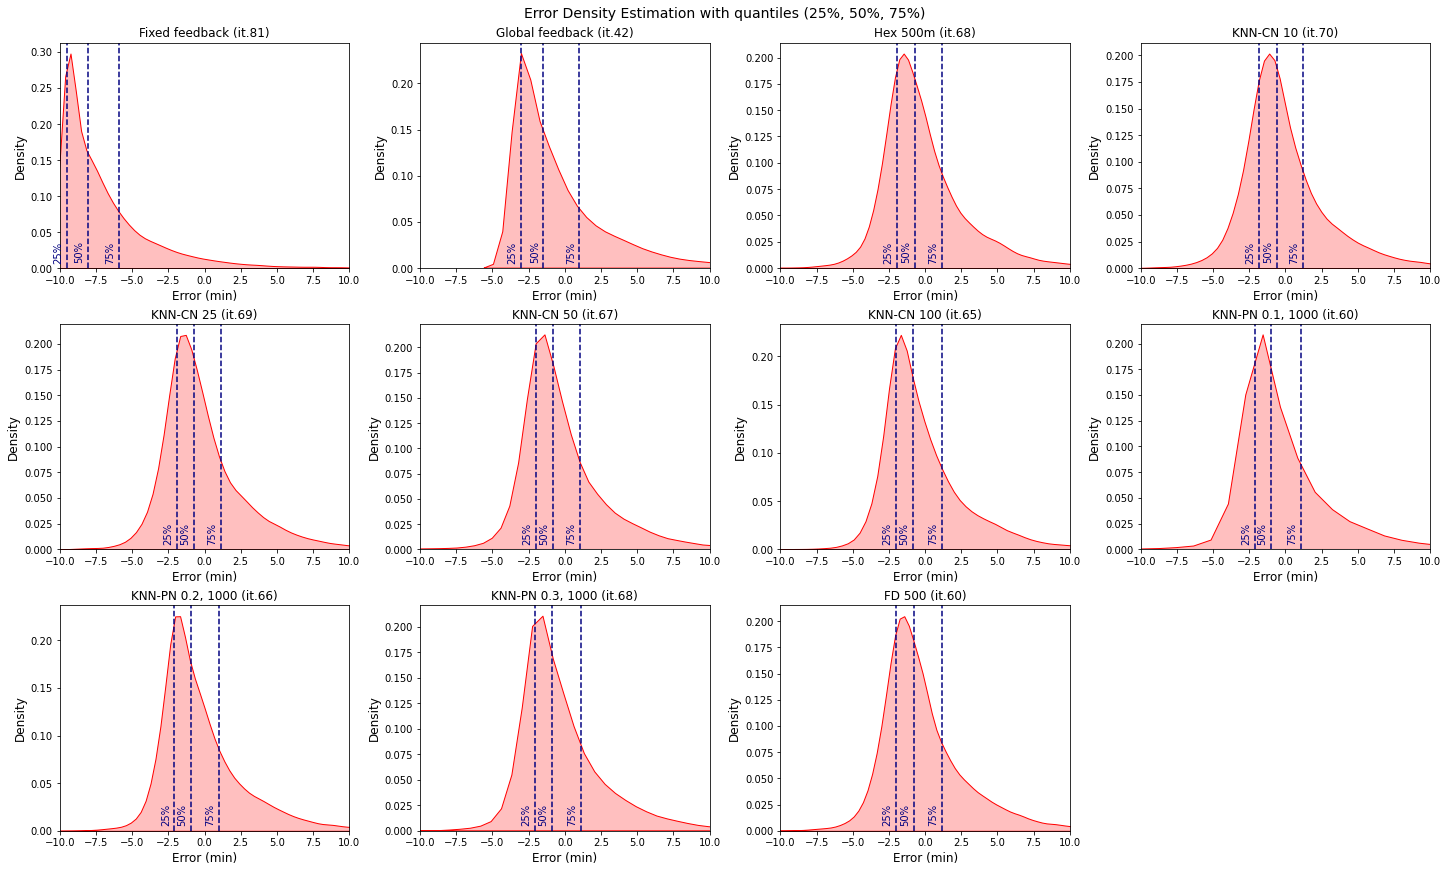

In [34]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods, 'waitTime', 3,4, kde_plot_limit=10, add_iteration_to_title=True)

,count,mean,std,min,25%,50%,75%,95%,99%,max,25% abs error,50% abs error,75% abs error,95% abs error,99% abs error,std abs error,MSE,RMSE,MAE,% errors < 0 (overestimated)
KNN-CN 25 Markov (it.68),32434,0.046132,3.480286,-13.957453,-1.934597,-0.762736,1.137321,6.256783,12.529174,62.873562,0.882081,1.717779,2.842511,6.542836,12.560595,2.591909,12.114144,3.480538,2.322962,62.459148
KNN-CN 25 Markov (it.69),32336,0.037987,3.490011,-13.751333,-1.921452,-0.754674,1.116356,6.096714,12.489666,59.714156,0.872847,1.721808,2.833946,6.394106,12.520039,2.613506,12.181244,3.490164,2.313187,62.614424
KNN-CN 25 MSA=0.2 (it.67),32280,-0.036506,3.555317,-14.253430,-2.024920,-0.858958,1.031277,6.101593,12.666062,120.882757,0.913606,1.791502,2.868533,6.454416,12.710923,2.663431,12.641221,3.555449,2.355282,63.680297
KNN-CN 25 MSA=0.2 (it.68),32155,-0.010141,3.642520,-13.305619,-1.994460,-0.827414,1.074678,5.989960,12.536916,112.595494,0.904821,1.771763,2.874537,6.317671,12.553604,2.785934,13.267639,3.642477,2.346532,63.591976
KNN-CN 25 MW=5 (it.67),32372,-0.015447,3.451740,-14.037875,-1.974166,-0.805721,1.081073,6.040101,12.368028,67.588497,0.893660,1.750397,2.832872,6.319180,12.421324,2.565883,11.914378,3.451721,2.308814,63.267639
KNN-CN 25 MW=5 (it.68),32219,0.009960,3.434963,-14.372047,-1.953531,-0.781367,1.083406,6.084446,12.335638,56.060174,0.887921,1.732873,2.828825,6.365916,12.372084,2.544945,11.798706,3.434924,2.306938,63.127347


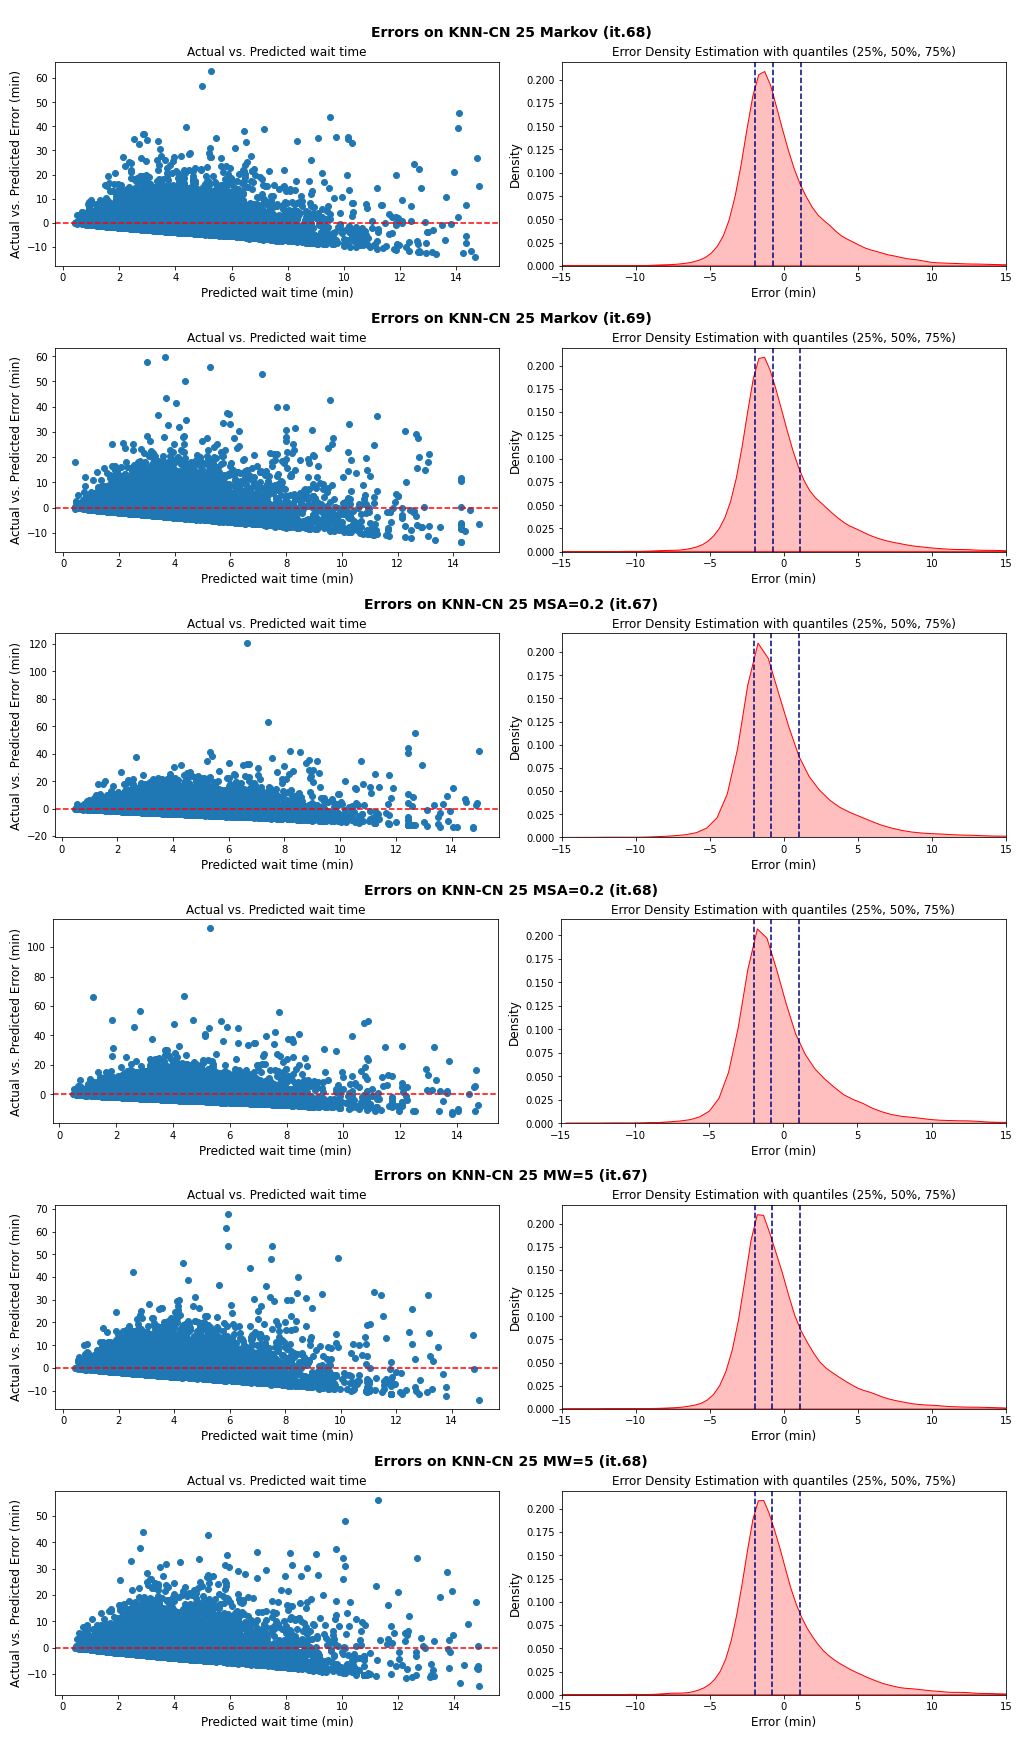

In [35]:
_ = predictions_evaluations.plot_multiple_actual_vs_fitted(
    compare_methods_smoothing, 'waitTime', kde_plot_limit=15, add_iteration_to_title=True)

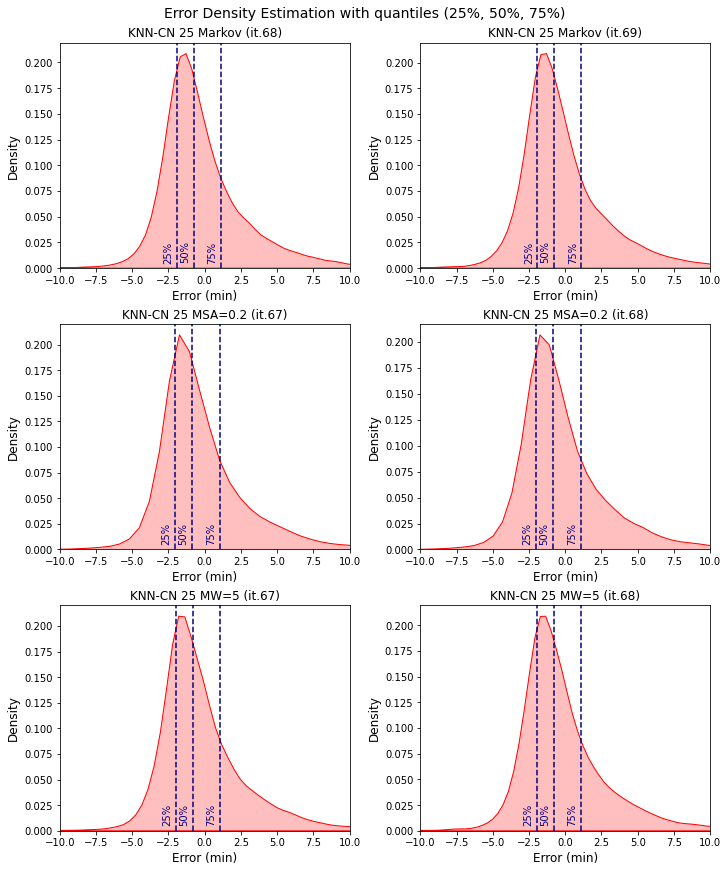

In [36]:
predictions_evaluations.plot_multiple_actual_vs_fitted_only_kde(
    compare_methods_smoothing, 'waitTime', 3,2, kde_plot_limit=10, add_iteration_to_title=True)

In [37]:
t = predictions_evaluations.get_confidence_intervals_table(
    compare_methods, 'waitTime', add_iteration_to_title=True,
    confidence_intervals=[1,2,3,4,5,7.5,10])
t

,% trips with abs error < 1,% trips with abs error < 2,% trips with abs error < 3,% trips with abs error < 4,% trips with abs error < 5,% trips with abs error < 7.5,% trips with abs error < 10
Fixed feedback (it.81),2.565930,5.336778,8.597648,12.611368,17.565039,40.480221,99.452067
Global feedback (it.42),18.204254,38.512746,59.149213,87.845429,90.563403,94.645235,96.629323
Hex 500m (it.68),28.683797,57.447793,76.942534,86.523335,91.236621,96.477374,98.210926
KNN-CN 10 (it.70),30.675722,58.548082,76.112507,85.725804,90.836357,96.356250,98.278910
KNN-CN 25 (it.69),28.612073,57.715858,77.325581,86.801089,91.529565,96.428130,98.271277
KNN-CN 50 (it.67),27.552844,56.821963,77.851729,87.092500,91.427867,96.317865,98.101929
KNN-CN 100 (it.65),26.238324,56.153096,77.686574,87.045948,91.587257,96.480800,98.103595
"KNN-PN 0.1, 1000 (it.60)",24.566245,52.726235,75.941257,86.351381,90.696863,95.756019,97.795540
"KNN-PN 0.2, 1000 (it.66)",25.633540,54.472050,77.717391,87.475155,91.872671,96.503106,98.170807
"KNN-PN 0.3, 1000 (it.68)",26.014862,55.137260,77.823497,87.379476,91.632377,96.336670,98.037831


In [38]:
navy_hex = matplotlib.colors.to_hex('navy')
red_hex = matplotlib.colors.to_hex('darkred')
c_gradient = utils.get_color_gradient(red_hex, navy_hex, 3)

plot_list_color = [
    ("CN 25 markov", data['dynamic_CN']['markov'][25], c_gradient[0], '-'),
    ("CN 25 MSA = 0.2", data['dynamic_CN']['msa02'][25], c_gradient[1], '--'),
    ("CN 25 MW = 5", data['dynamic_CN']['mw5'][25], c_gradient[2], ':')
]


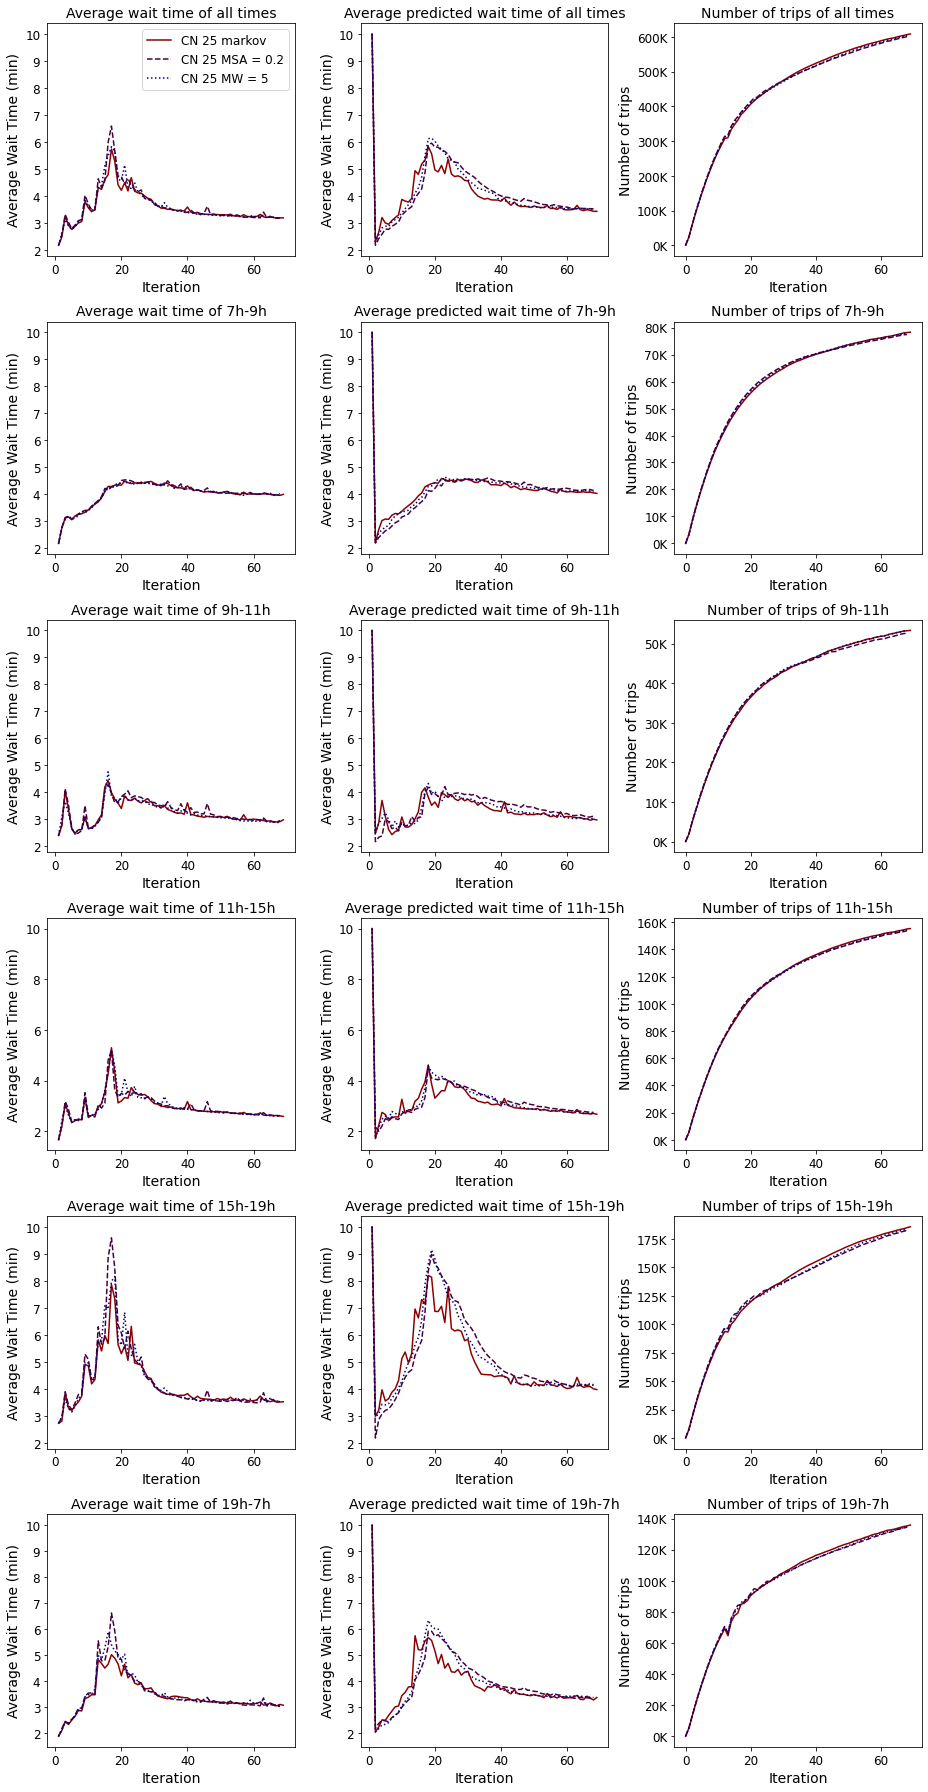

In [39]:
predictions_evaluations.plot_iteration_avg_wait_time(plot_list_color)